In [1]:
# libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
# city regions

regions = [
    'Aldoar',
    'Bonfim',
    'Campanha',
    'Centro',
    'Lordelo',
    'Paranhos',
    'Ramalde'
]

In [3]:
# read json files

region_data = {region: pd.read_json(f'logs/{region.lower()}.json') for region in regions}

In [4]:
def get_global_limits(regions, region_data):
    global_limits = {
        'chargers': [float('inf'), float('-inf')],
        'queue': [float('inf'), float('-inf')],
        'wait_time': [float('inf'), float('-inf')]
    }
    for region in regions:
        data = region_data[region]
        
        global_limits['chargers'][0] = min(global_limits['chargers'][0], min(data['chargers']))
        global_limits['chargers'][1] = max(global_limits['chargers'][1], max(data['chargers']))
        
        global_limits['queue'][0] = min(global_limits['queue'][0], min(data['queue']))
        global_limits['queue'][1] = max(global_limits['queue'][1], max(data['queue']))
        
        global_limits['wait_time'][0] = min(global_limits['wait_time'][0], min(data['wait']))
        global_limits['wait_time'][1] = max(global_limits['wait_time'][1], max(data['wait']))
    return {
        'chargers': global_limits['chargers'],
        'queue': global_limits['queue'],
        'wait_time': global_limits['wait_time']
    }

In [5]:
# get global min and max values

global_limits = get_global_limits(regions, region_data)

global_limits

{'chargers': [0, 171],
 'queue': [0.0, 19.333333333333332],
 'wait_time': [0.0, 450.17283950617286]}

In [6]:
def plot_charger_availability(axes, hours, chargers, global_limits, margin=0.02):
    axes.plot(hours, chargers, marker='o', markersize=1, label='Available Chargers') 
    axes.set_title('Charger Availability')
    axes.set_xlabel('Time (Hours)')
    axes.set_ylabel('Chargers')
    axes.legend()

    min_chargers, max_chargers = global_limits['chargers']
    axes.set_ylim([min_chargers - margin * (max_chargers - min_chargers), max_chargers + margin * (max_chargers - min_chargers)])

In [7]:
def plot_queue_variability(axes, hours, queue, global_limits, margin=0.02):
    axes.plot(hours, queue, marker='s', markersize=1, label='Average Queue Size', color='orange') 
    axes.set_title('Queue Variability')
    axes.set_xlabel('Time (Hours)')
    axes.set_ylabel('Cars')
    axes.legend()

    min_queue, max_queue = global_limits['queue']
    axes.set_ylim([min_queue - margin * (max_queue - min_queue), max_queue + margin * (max_queue - min_queue)])

In [8]:
def plot_wait_time(axes, hours, wait_times, global_limits, margin=0.02):
    min_wait_time, max_wait_time = global_limits['wait_time']  

    tick_values = np.arange(min_wait_time, max_wait_time + 30, 30)  # 30 minutes interval
    wait_times_formatted = [f"{int(wait // 60):02}:{int(wait % 60):02}" for wait in tick_values]

    axes.plot(hours, wait_times, marker='^', markersize=1, label='Average Wait Time', color='green') 
    axes.set_title('Queue Wait Times')
    axes.set_xlabel('Time (Hours)')
    axes.set_ylabel('Wait Duration (hh:mm)')
    axes.legend()
    axes.set_yticks(tick_values)
    axes.set_yticklabels(wait_times_formatted)

    axes.set_ylim([min_wait_time - margin * (max_wait_time - min_wait_time), max_wait_time + margin * (max_wait_time - min_wait_time)])

In [9]:
def plot_region_history(region, data, global_limits, margin=0.02):
    time_steps = np.linspace(0, 1440, len(data['chargers']), endpoint=False)
    hours = time_steps / 60

    fig, axes = plt.subplots(1, 3, figsize=(18, 7)) 

    plot_charger_availability(axes[0], hours, data['chargers'], global_limits, margin)
    plot_queue_variability(axes[1], hours, data['queue'], global_limits, margin)
    plot_wait_time(axes[2], hours, data['wait'], global_limits, margin)

    for ax in axes:
        ax.set_xticks(range(0, 25, 3))
        ax.set_xticklabels([f'{int(hour)}:00' for hour in range(0, 25, 3)])

    fig.suptitle(region, fontsize=16)

    plt.tight_layout()  
    plt.show()

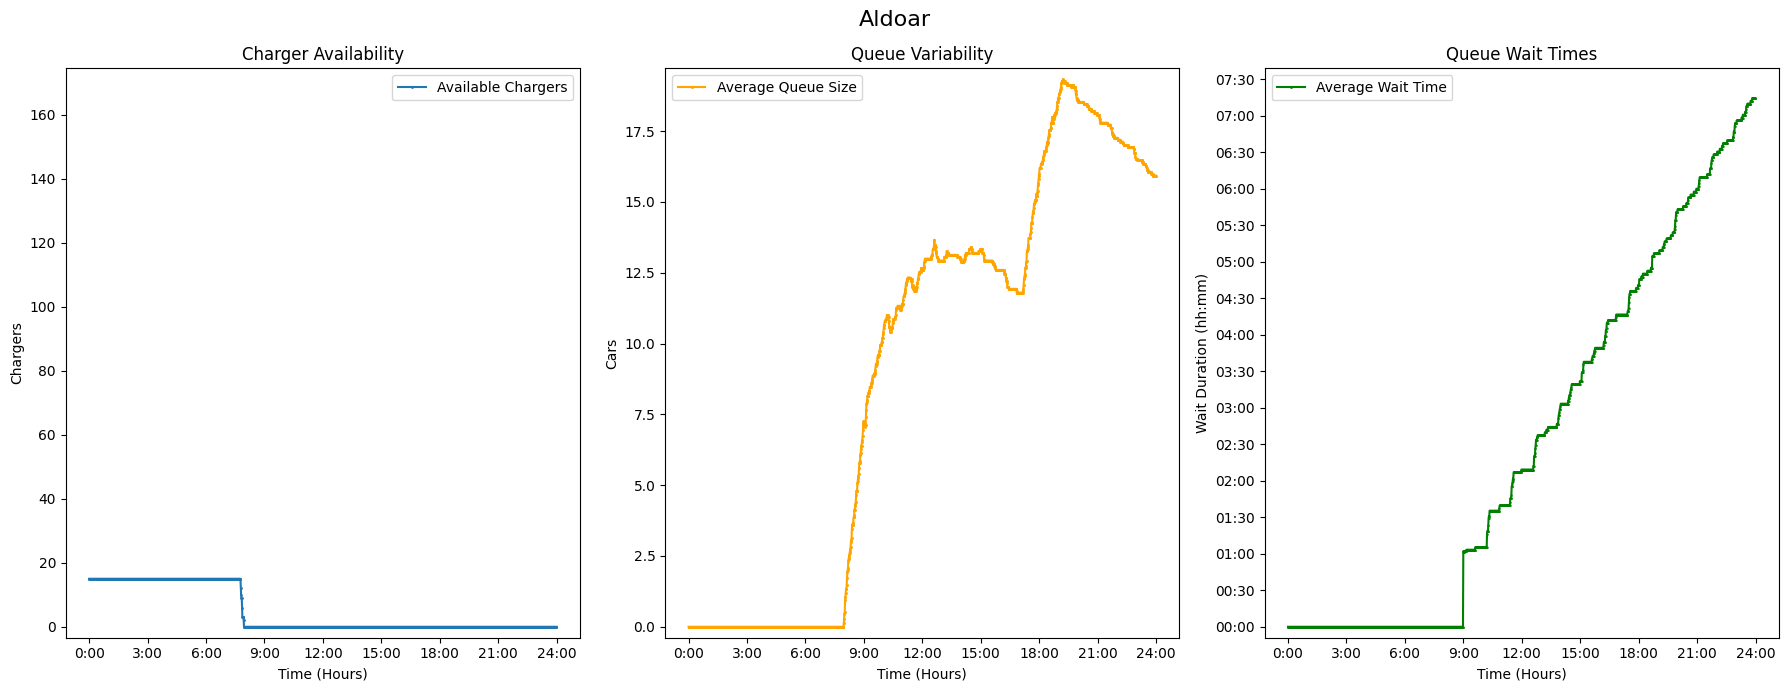

In [10]:
# aldoar history

plot_region_history('Aldoar', region_data['Aldoar'], global_limits)

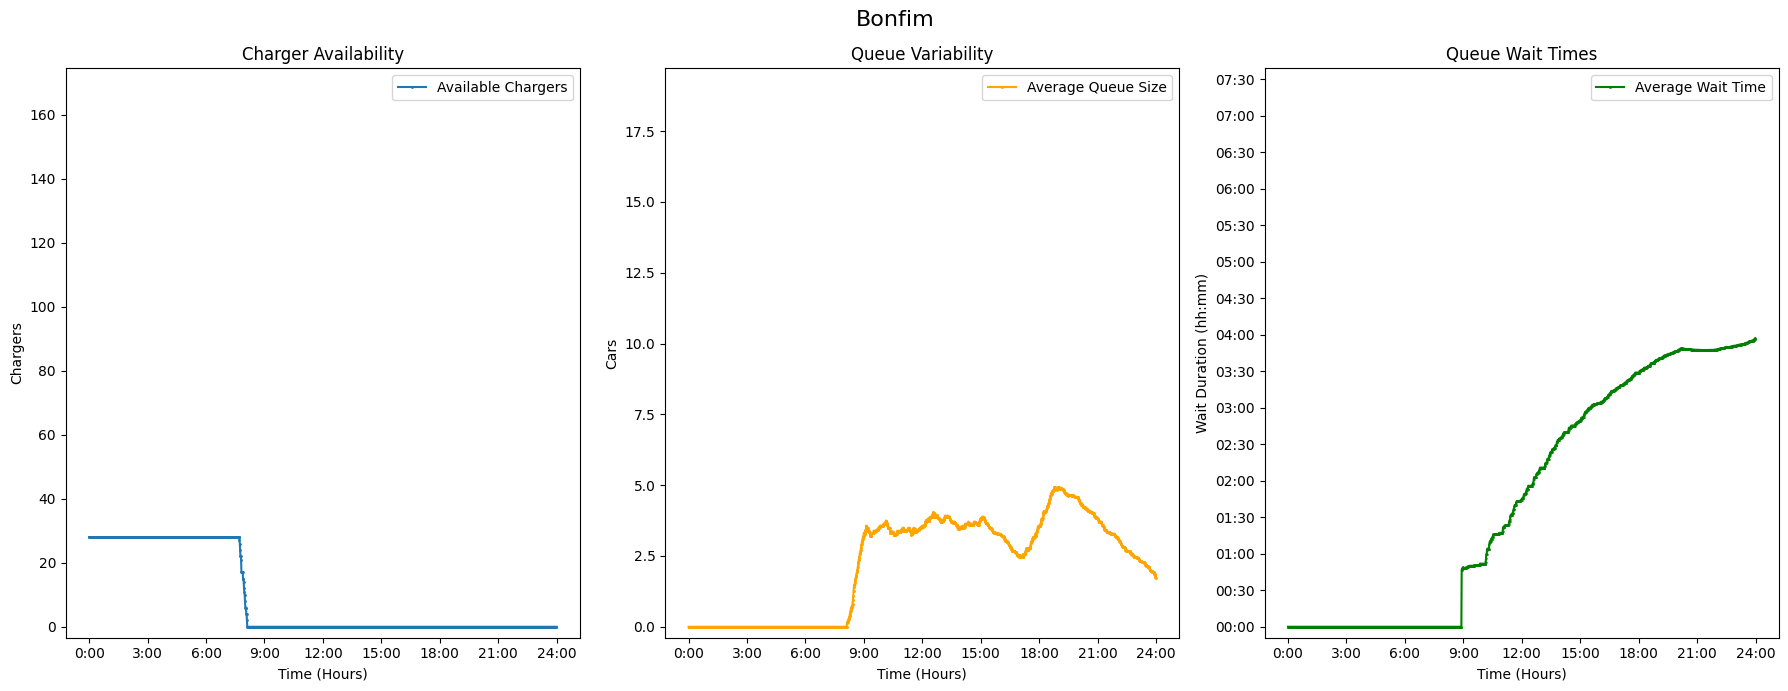

In [11]:
# bonfim history

plot_region_history('Bonfim', region_data['Bonfim'], global_limits)

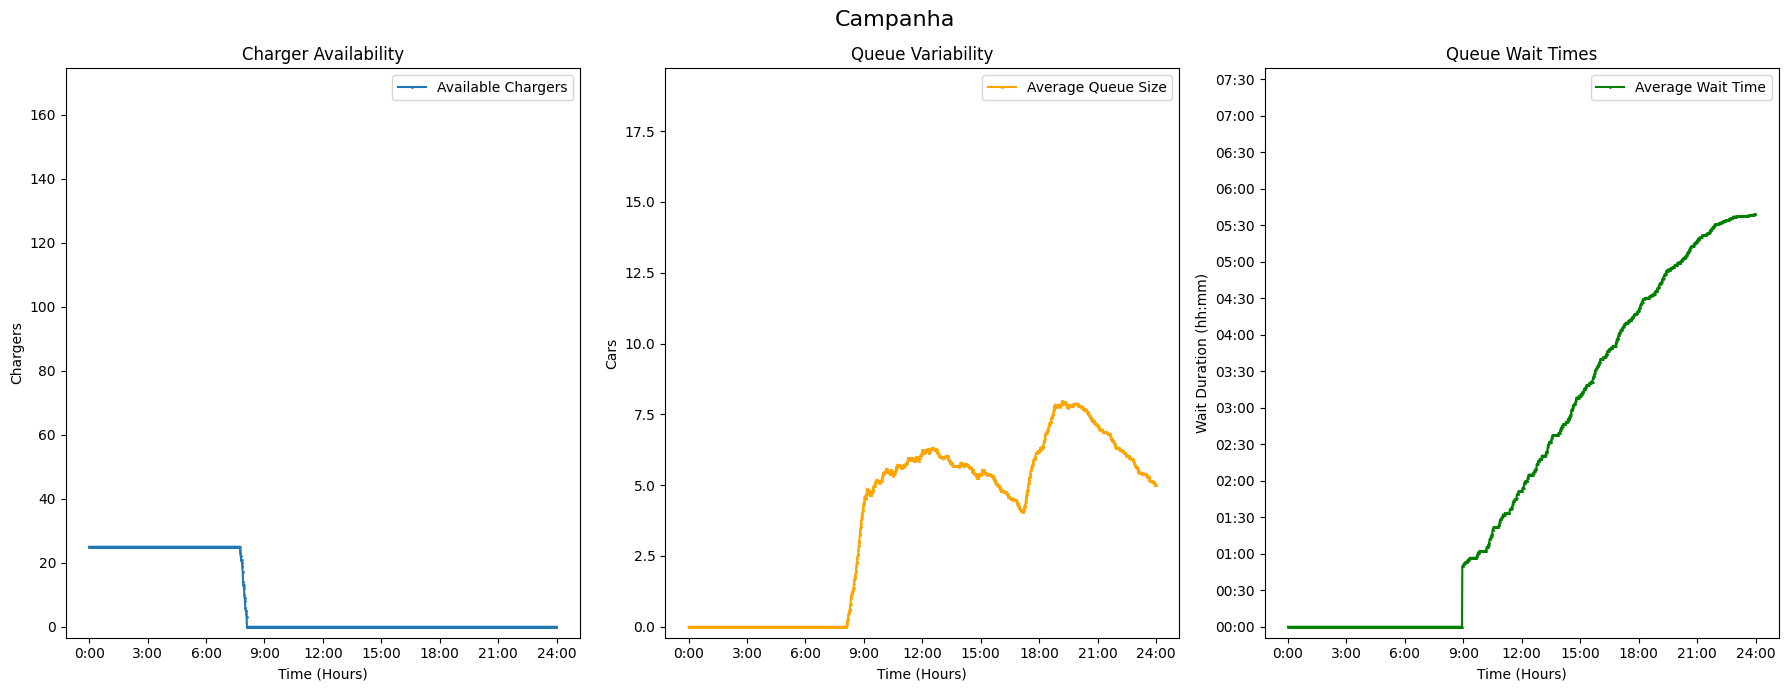

In [12]:
# campanha history

plot_region_history('Campanha', region_data['Campanha'], global_limits)

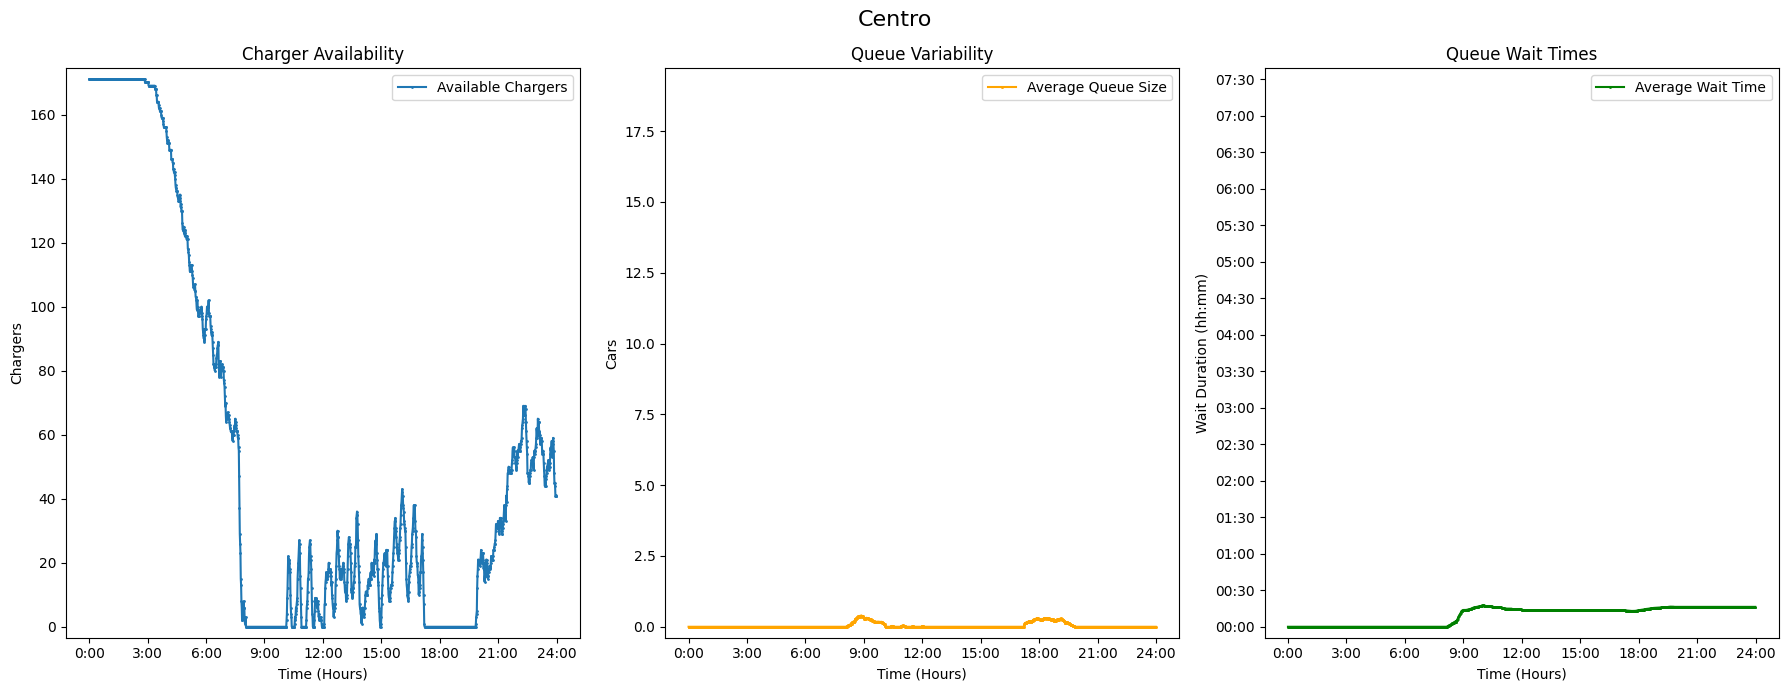

In [13]:
# centro history

plot_region_history('Centro', region_data['Centro'], global_limits)

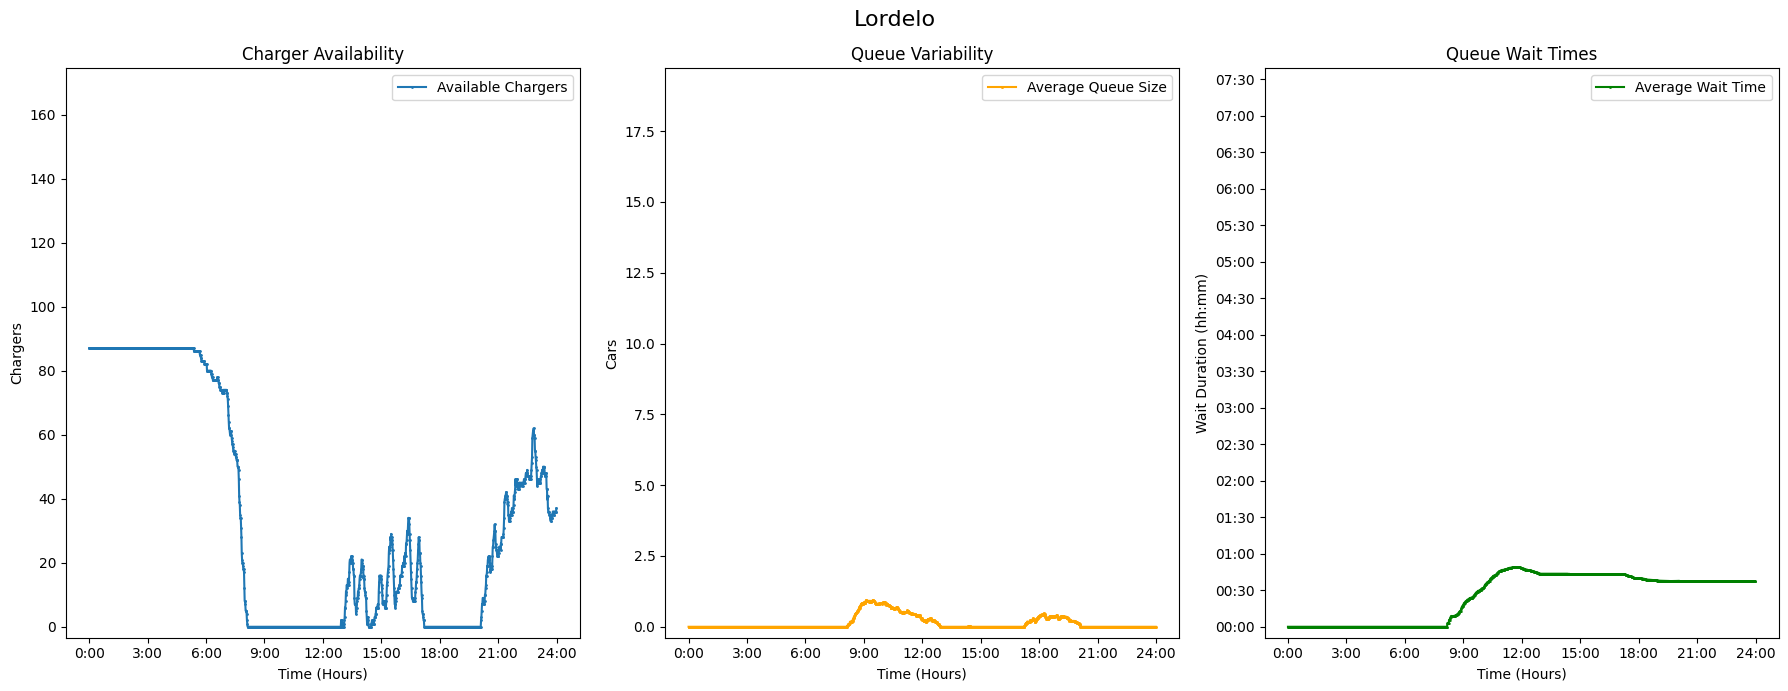

In [14]:
# lordelo history

plot_region_history('Lordelo', region_data['Lordelo'], global_limits)

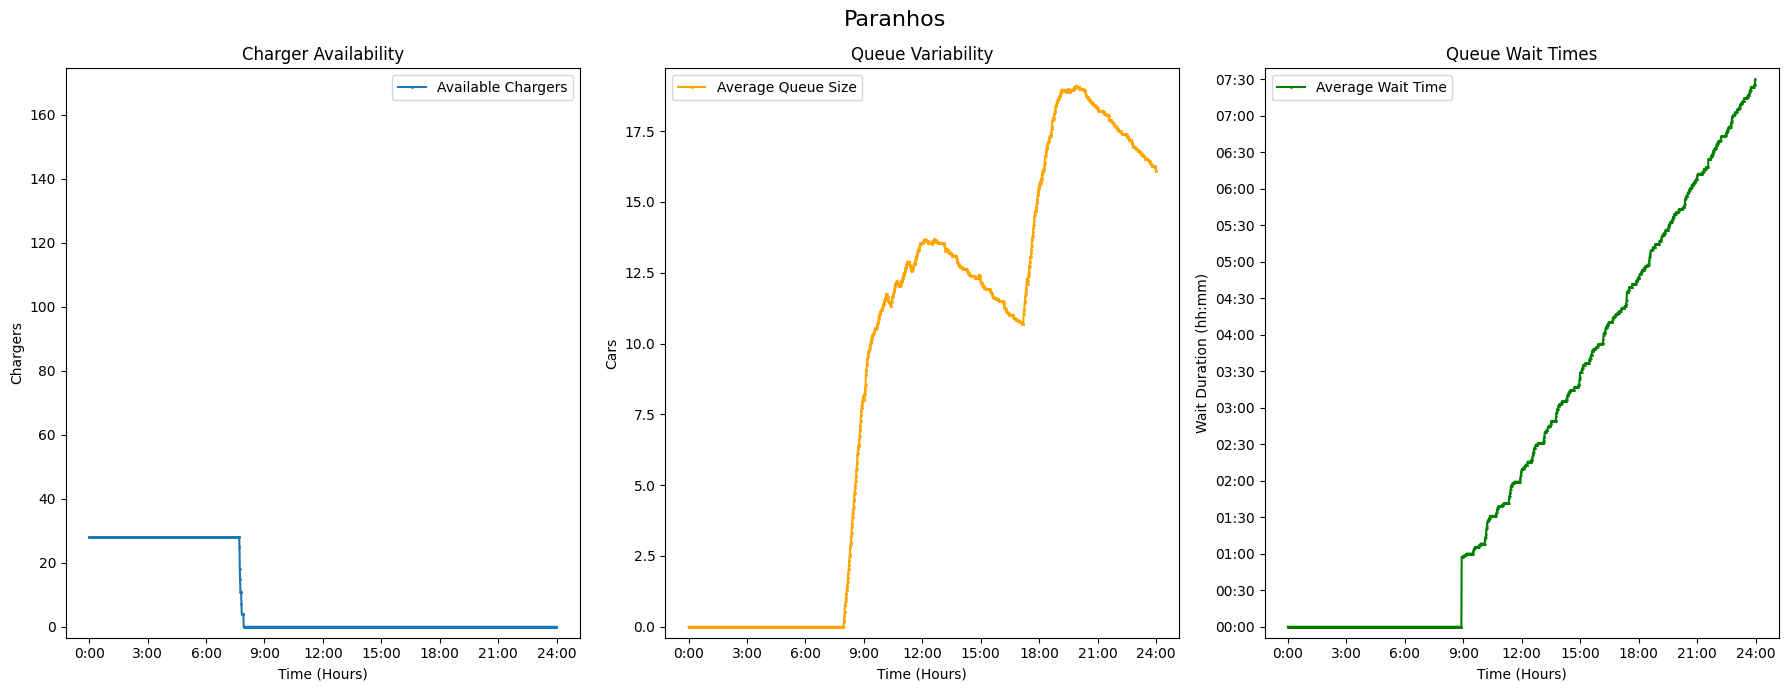

In [15]:
# paranhos history

plot_region_history('Paranhos', region_data['Paranhos'], global_limits)

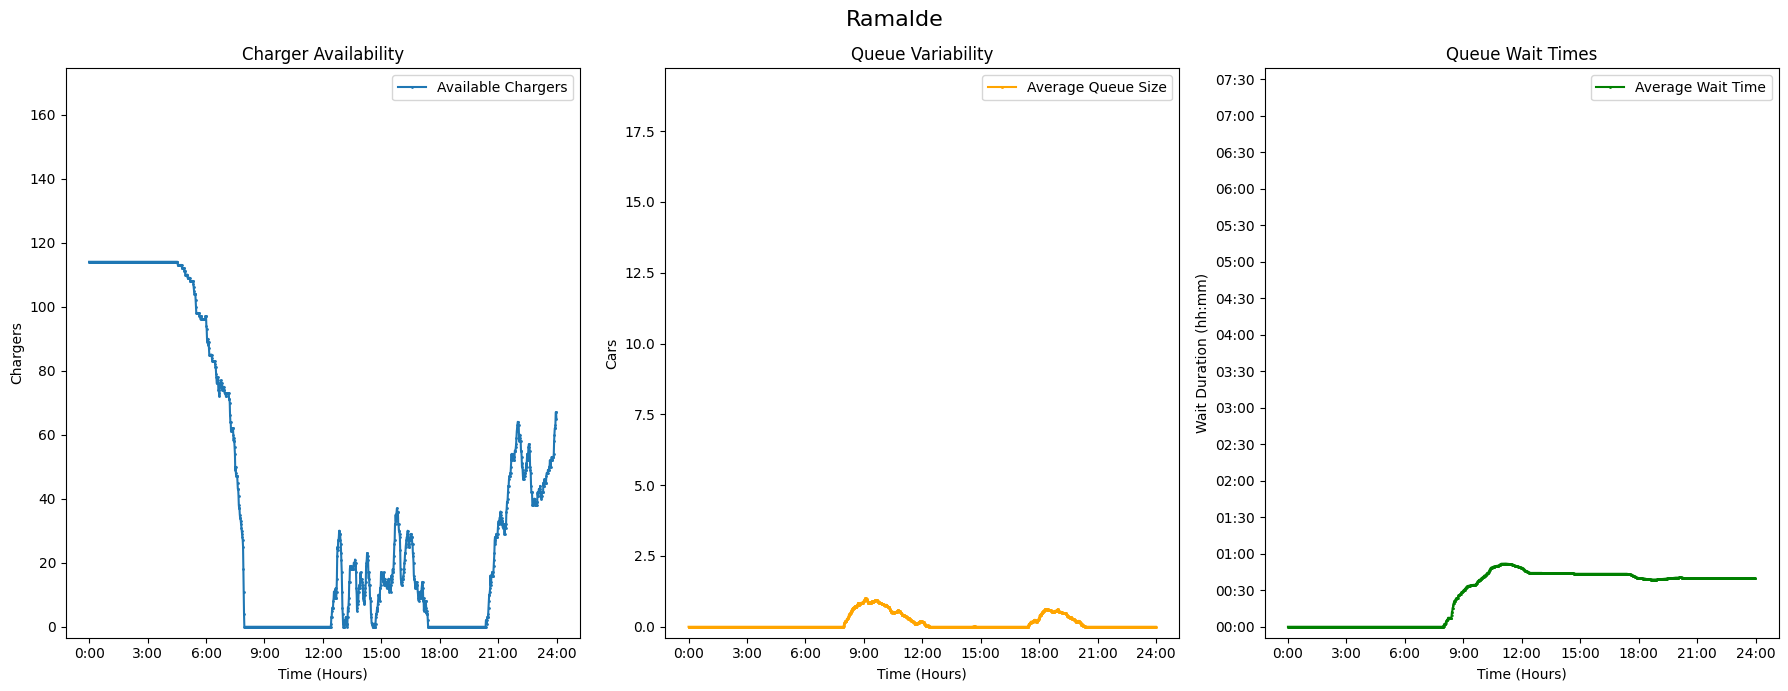

In [16]:
# ramalde history

plot_region_history('Ramalde', region_data['Ramalde'], global_limits)